<a href="https://colab.research.google.com/github/WMPantaleao/urban_scaling/blob/main/urban_scaling_r0_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_usa = pd.read_csv('df_cases_usa.csv', sep = ',', encoding = 'iso-8859-1')
df_usa = df_usa.drop(['Unnamed: 0'], 1)
df_usa

<ipython-input-64-86d7a21b1b16>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_eua = df_eua.drop(['Unnamed: 0'], 1)


,MSA,POP,RHO,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22,9/22/22,9/23/22,9/24/22
0,C2950,12728,5.458437,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,3.272429e+03,3.275571e+03,3.278714e+03,3.281857e+03,3.283714e+03,3.285571e+03,3.287571e+03,3.289571e+03,3.291571e+03,3.293571e+03
1,C4690,12769,5.078196,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,3.916286e+03,3.919857e+03,3.923429e+03,3.927000e+03,3.930286e+03,3.933571e+03,3.935857e+03,3.938143e+03,3.939571e+03,3.941000e+03
2,C1878,13283,1.081227,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,3.397571e+03,3.399857e+03,3.402143e+03,3.404429e+03,3.406571e+03,3.408857e+03,3.411143e+03,3.413286e+03,3.415000e+03,3.416714e+03
3,C2854,13901,1.104720,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,5.010286e+03,5.012429e+03,5.014571e+03,5.016714e+03,5.018857e+03,5.021000e+03,5.021286e+03,5.021571e+03,5.021857e+03,5.022143e+03
4,C4682,14070,13.179438,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,3.712571e+03,3.714857e+03,3.717143e+03,3.719429e+03,3.721714e+03,3.724000e+03,3.724857e+03,3.725714e+03,3.726571e+03,3.727429e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,C2642,7066141,330.364964,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1.875302e+06,1.876482e+06,1.877662e+06,1.878842e+06,1.879805e+06,1.880769e+06,1.881619e+06,1.882469e+06,1.883199e+06,1.883928e+06
905,C1910,7643907,318.105437,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,2.025600e+06,2.027087e+06,2.028573e+06,2.030060e+06,2.031332e+06,2.032559e+06,2.033650e+06,2.034694e+06,2.035628e+06,2.036561e+06
906,C1698,9458539,507.438780,0.0,0.0,0.333333,0.5,0.6,0.666667,0.714286,...,2.598736e+06,2.600486e+06,2.602236e+06,2.603987e+06,2.605540e+06,2.607019e+06,2.608622e+06,2.610577e+06,2.612495e+06,2.614413e+06
907,C3108,13214799,1052.344357,0.0,0.0,0.000000,0.0,0.4,0.666667,0.857143,...,4.151695e+06,4.153736e+06,4.155669e+06,4.157603e+06,4.159390e+06,4.161163e+06,4.162888e+06,4.164582e+06,4.166210e+06,4.167838e+06


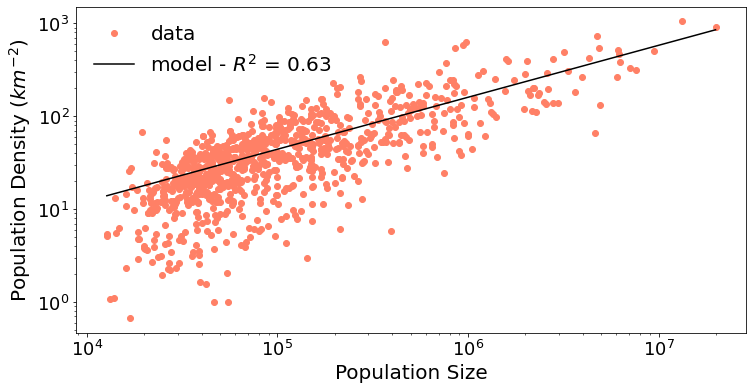

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def test_exp(x, a, b):
    return  a * x ** b

param, param_cov = curve_fit(test_exp, df_usa['POP'], df_usa['RHO'])
z = test_exp(df_usa['POP'], param[0], param[1])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.loglog(df_usa['POP'], df_usa['RHO'], 'o', color = '#ff8066', label = r'data')
ax.plot(df_usa['POP'], z, 'k', label = r'model - $R^{2}$ = %.2f' %r2_score(df_usa['RHO'], z))
ax.tick_params(axis = 'both', labelsize = 18)

ax.set_ylabel(r'Population Density $(km^{-2})$', fontsize = 20)
ax.set_xlabel(r'Population Size', fontsize = 20)
ax.legend(frameon = False, loc = 'upper left', fontsize = 20)
plt.show()

In [ ]:
import numpy as np

def r0_seir(group: pd.DataFrame, tau: float, tau_e: float, start: float, t: float):
  
  r0_seir = []
  gamma = 1 / tau
  sigma = 1/ tau_e

  for i in range(0, len(group)):
    casos = pd.DataFrame(group.iloc[i, 3:]).reset_index()
    casos = casos.drop(['index'], 1)
    
    for j in range(len(casos)):
      if casos.iloc[j, 0] >= start:
        alpha = (np.log(casos.iloc[j + t, 0]) - np.log(casos.iloc[j, 0])) / t
        r_0_seir = ((alpha + sigma) * (alpha + gamma)) / (sigma * gamma)
        break
    
    r0_seir.append(r_0_seir)
    df_r0_seir = pd.DataFrame(r0_seir)
    df_r0_seir['POP'] = group['POP']
    df_r0_seir['RHO'] = group['RHO']
    df_r0_seir['R0'] = df_r0_seir[0]
    df_r0_seir = df_r0_seir.drop([0], 1)

  return df_r0_seir

In [ ]:
df_usa_r0 = r0_seir(df_usa, 11.5, 5.1, 1, 60)
df_usa_r0

<ipython-input-66-b89cb8927cd0>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  casos = casos.drop(['index'], 1)
<ipython-input-66-b89cb8927cd0>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_r0_seir = df_r0_seir.drop([0], 1)


,POP,RHO,R0
0,12728,5.458437,1.969645
1,12769,5.078196,1.600058
2,13283,1.081227,1.568395
3,13901,1.104720,1.801116
4,14070,13.179438,1.820267
...,...,...,...
904,7066141,330.364964,4.937268
905,7643907,318.105437,4.606079
906,9458539,507.438780,4.261670
907,13214799,1052.344357,3.794805


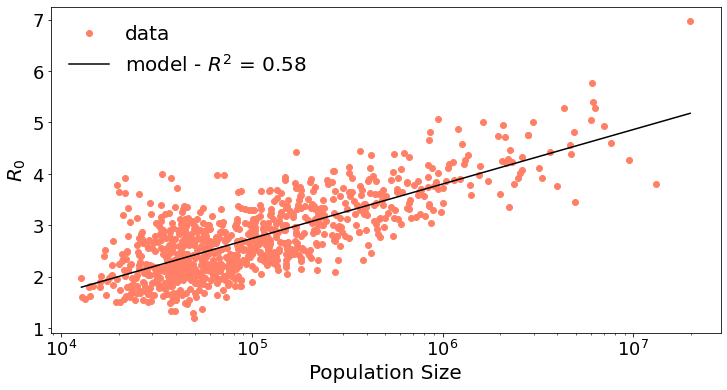

In [ ]:
x_pop = df_usa_r0['POP']
y = df_usa_r0['R0']

def test_log(x, a, b):
    return a + b * np.log(x)

param_pop, param_cov_pop = curve_fit(test_log, x_pop, y)
z_pop = test_log(x_pop, param_pop[0],  param_pop[1])

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.semilogx(x_pop, y, 'o', color = '#ff8066', label = r'data')
ax.plot(x_pop, z_pop, 'k', label = r'model - $R^{2}$ = %.2f' %r2_score(y, z_pop))
ax.tick_params(axis = 'both', labelsize = 18)

ax.set_ylabel(r'$R_0$', fontsize = 20)
ax.set_xlabel(r'Population Size', fontsize = 20)
ax.legend(frameon = False, loc = 'upper left', fontsize = 20)
plt.show()

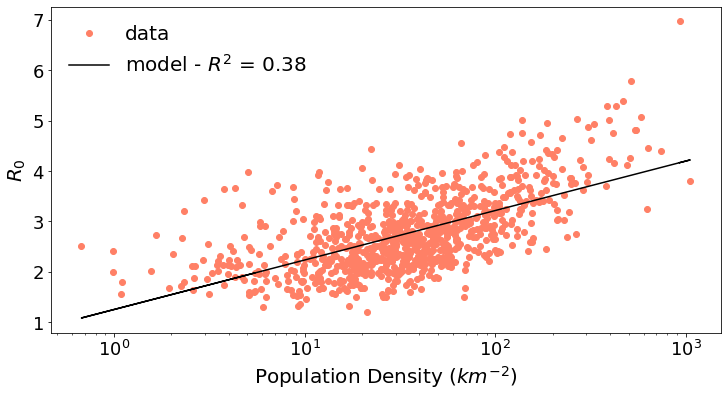

In [ ]:
x_rho = df_usa_r0['RHO']

param_rho, param_cov_rho = curve_fit(test_log, x_rho, y)
z_rho = test_log(x_rho, param_rho[0],  param_rho[1])

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.semilogx(x_rho, y, 'o', color = '#ff8066', label = r'data')
ax.plot(x_rho, z_rho, 'k', label = r'model - $R^{2}$ = %.2f' %r2_score(y, z_rho))
ax.tick_params(axis = 'both', labelsize = 18)

ax.set_ylabel(r'$R_0$', fontsize = 20)
ax.set_xlabel(r'Population Density $(km^{-2})$', fontsize = 20)
ax.legend(frameon = False, loc = 'upper left', fontsize = 20)
plt.show()